# BOSTON

MEDV:주택가격(중앙값)
CRIM:범죄율
ZN:주거지 비율
INDUS:비소매업 비율
CHAS:강 조망
NOX:산화질소 농도
RM:주거당 평균 객실 수
AGE:노후 건물 비율
DIS:중심지(노동센터)접근 거리
RAD:고속도로 접근 편이성 지수
TAX:재산세율
PTRATIO:학생당 교사 비율
B:흑인 인구 비율
LSTAT:저소득층 비율

# 추진배경 및 목적

다음은 1970년대 BOSTON 주택 가격과 그 가격에 영향을 주는 요인들에 대한 Data Set이다. 이 DataSet을 분석하며, 이번 한주간 배웠던 주택가격에 가장 큰 영향을 끼치는 데이터 수집/ 정제/ 변환, 분석계획 및 데이터 탐색적 분석(그래프로 시각화), 문제 분석 및 결과 해석(선형회귀, 피어슨), 모델 평가와 같은 지식들을 종합적으로 활용하고 실제적으로 체득하는 것을 목적으로 한다.

데이터 분석을 통해, 가설을 검증하고 집 값에 큰 영향을 주는 관련인자들에 대한 정보들을 추출한다. 그리고 분석한 정보를 토대로 어떤 비지니스적인 선택을 하는 것이 좋을지 의사 결정을 한다. 

# 1. 가설 설정

목표 변수는 MEDV(주택가격)이다.

가설.1 강 조망권을 갖춘 주택(건물)이 주택가격이 높을 것이다.
(한국에서 한강이 보이는 집이 가격이 비싼 것과 일맥 상통하는 가설 설정이다.)

가설.2 노후 건물 비율과 대기 질 간의 관계가 있을 것이다.
(대기의 질이 안 좋으면 건물이 쉽게 노후될 것이기 때문이다.)
(노후된 건물은 새로운 건물 보다 낮은 가격에 측정되는 것은 상식이다.)
따라서, 대기 질이 좋은 장소가 주택 가격도 높을 것이다.

가설.3 흑인 인구 비율과 저소득층 비율이 높은 지역은 범죄율이 높을 것이다. 
(1970년대 보스턴에는 저소득층 흑인들이 모여사는 슬럼가가 있었고, 범죄가 빈번하게 일어났었다.)
(범죄율이 높은 지역은 사람들이 많이 살지 않으려고 하므로, 당연히 집 값이 낮을 것이다.)
따라서, 흑인 인구 비율이 높은 지역이 집 값이 낮을 것이다.

가설.4 선생님이 담당하는 학생이 적을 수록 집 값이 높을 것이다.
(미국은 공교육 시스템이 상당히 미비해서, 학생수 대비 선생님의 비율이 상당하게 적다.
따라서 보통은, 부유한 동네일수록 학생수 대비 선생님의 비율이 높게 나타난다.)

가설.5 주거당 평균 객실 수가 많을수록 집값이 높다.
(객실 수가 많다는 것은, 곧 건물이 넓다는 것을 의미한다. 넓은 건물이 더 높은 가격을 측정받는 것은 상식적으로 당연한 일이다.)

가설.6 재산세율이 낮은 지역일 수록, 저소득층 비율이 높을 것이다.
(보통 세금은 재산에 비례해서 납부하므로, 재산세율이 낮다는 것은 소득이 적다는 것을 의미할 것이다.)
(저소득층은 소득이 적으므로, 당연하지만 가격이 싼 집에 거주할 확률이 높다.)
따라서, 재산세율이 높은 지역의 집 값은 높을 것이다.

가설.7 주거지 비율이 높을 수록, 비소매업 비율이 낮을 것이다.
(소매업이란 가공된 물건을 판매하는 리테일을 의미한다. 반대로 비소매업은 물건을 가공하는 것을 의미한다.)
(물건을 가공하기 위해서는 공장이 필요할 것이고, 공장 주변은 소음과 매연으로 인해 주거지가 많지 않을 것이다.)
(주거지 비율이 높다는 것은, 유동인구가 상권에 비해서 적다는 것을 의미한다.)
(유동인구가 많은 지역은 많은 재화가 생산되므로, 유동인구가 많은 곳의 집 값이 높을 것이다.)
따라서, 주거지 비율이 높을 수록, 집 값이 쌀 것이다. (비상권이기 때문)

가설.8 중심지가 가까울 수록 집 값은 높을 것이다.
(어느나라든, 특정 지역의 랜드마크를 기준으로 거리가 멀어질 수록 집 값이 낮아진다.)

# 2. 데이터 처리

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale,minmax_scale,robust_scale
#%matplotlib inline background 그래프 실행 및 결과 확인
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
#font_path ='/usr/share/fonts/opentype/noto/NotoSerifCJK-ExtraLight.ttc'
#font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
#matplotlib.rc("font", family = font_name)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
# 추검정 및 통계 분석 패키지
from scipy import stats
from scipy.stats import shapiro
import scipy.stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from sklearn.linear_model import LinearRegression


In [45]:
#예측
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#Scale 변환:평균,표준편차 기준
from sklearn.preprocessing import StandardScaler
#주성분 분석
from sklearn.decomposition import PCA
#회귀분석
import statsmodels.api as sm
#RMSE:root mean squared error 함수
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
#MAPE:mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [46]:
#step1:데이터 구성하기
df=pd.read_csv("/Users/joylee/Downloads/Bigdata/BOSTON_HOUSING.csv", engine = 'python',encoding='euckr')
df.tail() #데이터 불러오기

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.0,391.989990,9.67
502,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.0,396.899994,9.08
503,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.899994,5.64
504,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.0,393.450012,6.48
505,11.9,0.04741,0.0,11.93,0,0.573,6.030,80.800003,2.5050,1,273,21.0,396.899994,7.88


In [47]:
df.isnull().sum() #결측치는 없는 것으로 확인되었다.

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

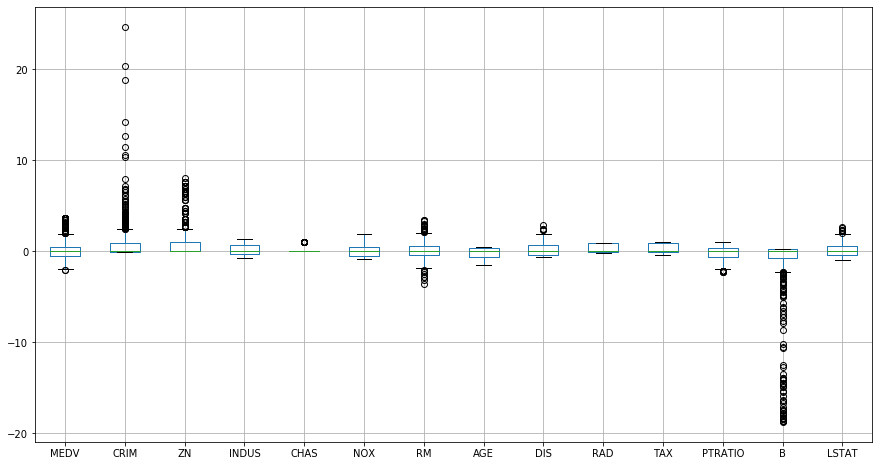

In [48]:
#표준화 ->평균을 0으로 맞춰서 그래프 분석에 편의성을 증대시키기 위함.
df_raw=robust_scale(df)
df_raw=pd.DataFrame(df_raw,columns=df.columns)
df_raw.boxplot(figsize=(15,8))

# 2-1 이상치 제거

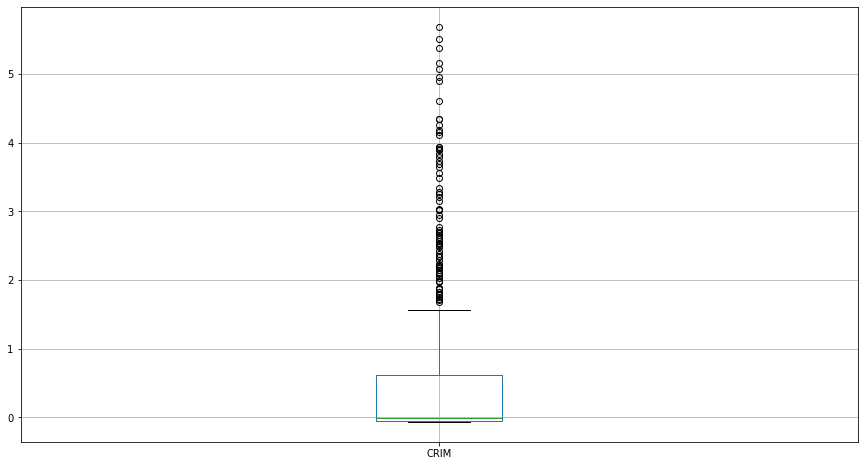

In [49]:
#CRIM 이상치 제거
#CRIM의 이상치 기준을 정규분포를 가정하고 확률적 계산에 따라 평균에서 6시그마 이하로 설정하였다. 
df_raw = df_raw[df_raw["CRIM"]<=6]

df_raw.boxplot(figsize=(15,8),column = "CRIM")

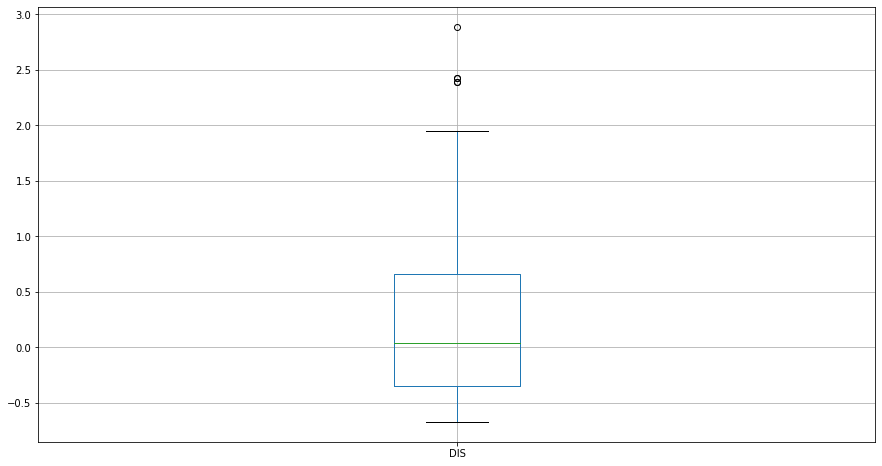

In [50]:
#DIS 이상치 제거
#DIS의 이상치가 소수이기에 데이터의 일관성 유지를 위해 이상치를 삭제한다.
df_raw = df_raw[df_raw["DIS"]<3]

df_raw.boxplot(figsize=(15,8),column = "DIS")

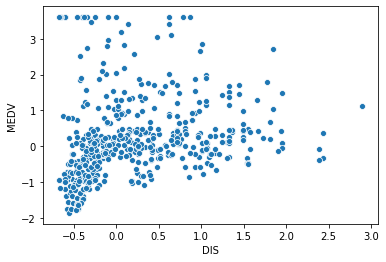

In [51]:
#DIS 이상치 제거 확인 1 - scatter
sns.scatterplot(x="DIS",y = "MEDV", data = df_raw)

458

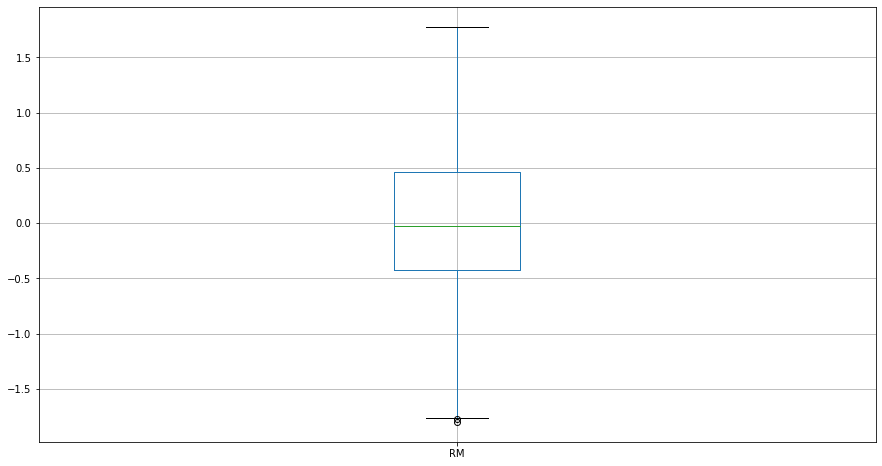

In [52]:
#DIS 이상치 제거 확인 2 - boxplot
df_raw = df_raw[-2<df_raw["RM"]]
df_raw = df_raw[df_raw["RM"]<1.85]

df_raw.boxplot(figsize=(15,8),column = "RM")
df_raw["RM"].count()

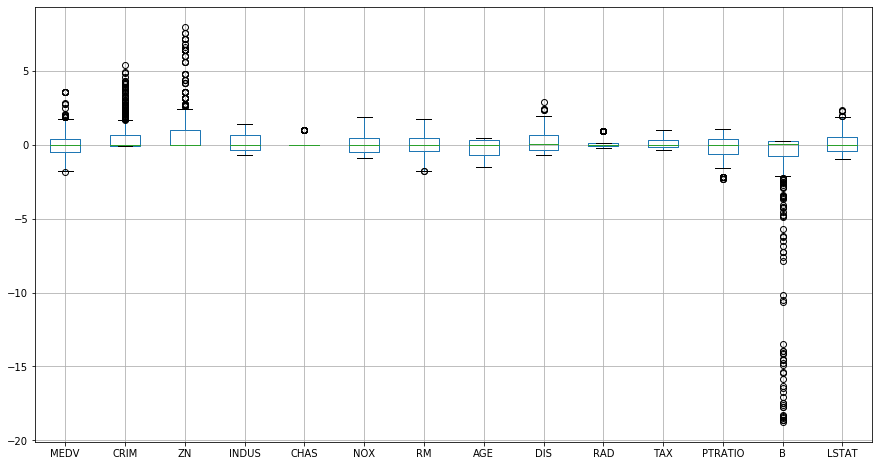

In [53]:
df_raw.boxplot(figsize=(15,8)) #정규화 하지 않은 모델로 이상치 제거 확인

In [54]:
#설명변수와 목적변수를 분리함.
df_raw_y=df_raw['MEDV']
df_raw_x=df_raw.drop("MEDV",axis=1,inplace=False)

In [55]:
#Train Data와 Test Data로 분할 (7대 3의 비율)
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print('train data X size:{}'.format(df_train_x.shape))
print('train data Y size:{}'.format(df_train_y.shape))
print('test data X size:{}'.format(df_test_x.shape))
print('test data Y size:{}'.format(df_test_y.shape))

train data X size:(320, 13)
train data Y size:(320,)
test data X size:(138, 13)
test data Y size:(138,)


# 3. 탐색적 분석

### 3-1 그래프 분석

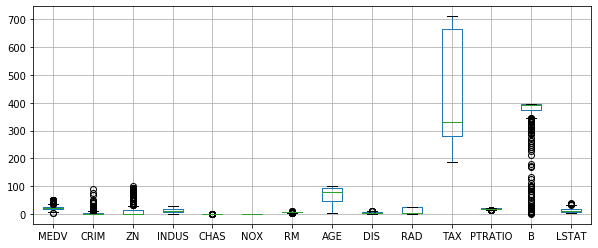

In [56]:
df.boxplot(figsize = (10,4)) #이상치가 존재하지 않는 것을 확인한다.

In [57]:
#전체 변수간의 관계를 확인하는 스캐터 차트
cols = ["MEDV", "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
sns.pairplot(df[cols])
plt.show()
#보스턴 데이터의 경우 0과 1로 표현된 CHAS 데이터를 제외하고는 가격을 포함한 대부분의 데이터가 양수인 실수이다.
#가격(MEDV)과 RM 데이터가 강한 양의 상관관계를 가지는 것을 볼 수 있다. 
#스캐터플롯상으로 볼 때는 AGE나 RAD 데이터는 가격과 음의 상관관계를 가지는 것처럼 보인다.

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1a1a22a320> (for post_execute):


KeyboardInterrupt: 

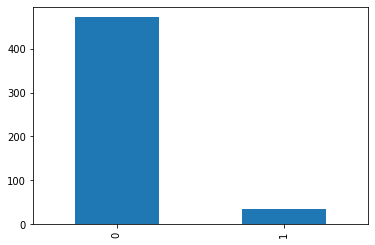

In [58]:
#CHAS 이산형으로 1이 조망, 0이 비조망
#비조망 주택의 수가 조망 주택에 비해 훨씬 높음.
df_count = df["CHAS"].value_counts()
df_count.plot.bar()

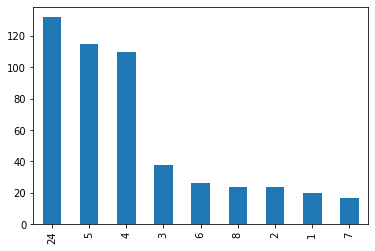

In [59]:
#RAD 연속형 데이터이지만, 그 종류가 많지 않음.
#RAD는 고속도로 접근 편이성 지수이다. 
#중심지와 가장 멀리 떨어진 곳이 가장 많다.
df_count = df["RAD"].value_counts()
df_count.plot.bar()

### 3-2 상관분석 가설검정 (피어슨)  

가설1. 강 조망권을 갖춘 주택이 주택 가격이 높을 것이다.

In [61]:
corr , pval = stats.pearsonr(df_raw_y, df_raw_x["CHAS"])
print(corr)
print(pval)
#상관 계수가 0.13이므로 주택 가격과 강 조망권은 유의하지 않다.

0.1347818866791291
0.0038552052898086294


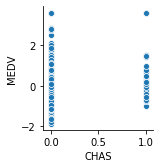

In [62]:
sns.pairplot(df_raw, y_vars= ["MEDV"], x_vars = ["CHAS"])  

가설2. 노후 건물비율과 대기 질 간의 관계가 있을 것이다. 따라서, 대기질이 좋은 장소가 주택 가격도 높을 것이다.

In [129]:
corr , pval = stats.pearsonr(df_raw_x["AGE"], df_raw_x["NOX"])
print(corr)
print(pval)
#상관계수가 0.72이므로 노후 건물비율과 대기질은 유의하다.

0.7226759999191762
3.698062282300278e-75


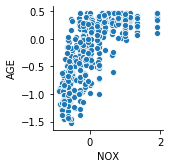

In [132]:
sns.pairplot(df_raw, y_vars= ["AGE"], x_vars = ["NOX"])  

In [133]:
corr , pval = stats.pearsonr(df_raw_y, df_raw_x["AGE"])
print(corr)
print(pval)
#상관계수가 -0.40이므로 노후 건물비율과 주택 가격은 유의하지 않다.

-0.40423965441124315
1.966882406451431e-19


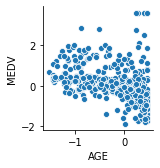

In [134]:
sns.pairplot(df_raw, y_vars= ["MEDV"], x_vars = ["AGE"])  

가설3. 흑인 인구 비율과 저소득층 비율이 높은 지역은 범죄율이 높을 것이다. 따라서, 흑인 인구 비율이 높은 지역이 집 값이 낮을 것이다.

In [63]:
corr , pval = stats.pearsonr(df_raw_x["LSTAT"], df_raw_x["B"])
print(corr)
print(pval)
#상관계수가 -0.37이므로 흑인 인구 비율과 저소득층 비율은 유의하지 않다.

-0.37039120531321357
2.4349266567393457e-16


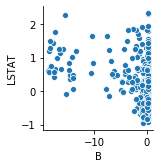

In [135]:
sns.pairplot(df_raw, y_vars= ["LSTAT"], x_vars = ["B"])  

In [64]:
corr , pval = stats.pearsonr(df_raw_x["CRIM"], df_raw_x["B"])
print(corr)
print(pval)
#상관계수가 -.0488이므로 흑인 인구 비율과 범죄율 또한 유의하지 않다.

-0.48839363350180387
7.898175799286691e-29


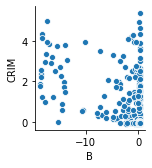

In [136]:
sns.pairplot(df_raw, y_vars= ["CRIM"], x_vars = ["B"])  

In [65]:
corr , pval = stats.pearsonr(df_raw_x["LSTAT"], df_raw_x["CRIM"])
print(corr)
print(pval)
#상관계수가 0.52이므로 저소득층 비율과 범죄율은 유의하지 않다.(하지만 비교적 유의하다고도 볼 수 있다.)

0.5296242605754635
1.7726327429850099e-34


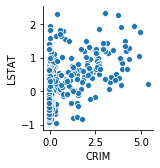

In [141]:
sns.pairplot(df_raw, y_vars= ["LSTAT"], x_vars = ["CRIM"])  

In [137]:
corr , pval = stats.pearsonr(df_raw_y, df_raw_x["B"])
print(corr)
print(pval)
#상관계수가 0.36이므로 흑인 인구 비율과 주택 가격은 유의하지 않다.

0.3642040422795388
8.200078269696541e-16


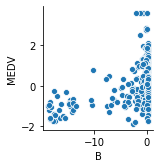

In [139]:
sns.pairplot(df_raw, y_vars= ["MEDV"], x_vars = ["B"])  

In [138]:
corr , pval = stats.pearsonr(df_raw_y, df_raw_x["LSTAT"])
print(corr)
print(pval)
#상관계수가 -0.73이므로 저소득층 비율과 주택 가격은 유의하다.

-0.7353313668118623
4.573934489872434e-79


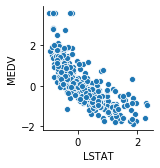

In [140]:
sns.pairplot(df_raw, y_vars= ["MEDV"], x_vars = ["LSTAT"])  

가설4. 선생님이 담당하는 학생이 적을 수록 집 값이 높을 것이다.

In [145]:
corr , pval = stats.pearsonr(df_raw_y, df_raw_x["PTRATIO"])
print(corr)
print(pval)
#상관계수가 -0.42이므로 학생당 교사비율과 주택 가격은 유의하지 않다.

-0.42863204731280435
6.834199834660365e-22


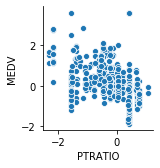

In [71]:
sns.pairplot(df_raw, y_vars= ["MEDV"], x_vars = ["PTRATIO"])  

가설5. 주거당 평균 객실 수가 많을 수록 집 값이 높다.

In [66]:
corr , pval = stats.pearsonr(df_raw_y , df_raw_x["RM"])
print(corr)
print(pval)
#상관계수가 0.58이므로 주택 가격과 주거당 평균 객실 수의 관계는 유의하다.

0.5820880290723871
6.87580702252398e-43


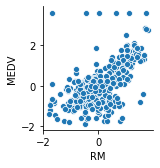

In [67]:
sns.pairplot(df_raw, y_vars= ["MEDV"], x_vars = ["RM"])  

가설6. 재산세율이 낮은 지역일 수록, 저소득층 비율이 높을 것이다. 따라서, 재산세율이 높은 지역의 집 값은 높을 것이다.

In [146]:
corr , pval = stats.pearsonr(df_raw_x["TAX"] , df_raw_x["LSTAT"])
print(corr)
print(pval)
#상관계수가 0.49이므로 주택 가격과 주거당 재산 세율의 관계는 유의하지 않다.

0.49324195548222094
1.8727890306815928e-29


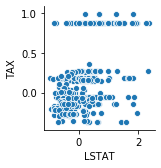

In [148]:
sns.pairplot(df_raw, y_vars= ["TAX"], x_vars = ["LSTAT"])  

In [147]:
corr , pval = stats.pearsonr(df_raw_y , df_raw_x["TAX"])
print(corr)
print(pval)
#상관계수가 -0.42이므로 주택 가격과 재산세율의 관계는 유의하지 않다.

-0.42074092579431677
4.4906222597219255e-21


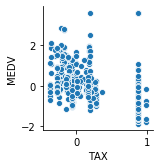

In [149]:
sns.pairplot(df_raw, y_vars= ["MEDV"], x_vars = ["TAX"])  

가설7. 주거지 비율이 높을 수록, 비소매업 비율이 낮을 것이다. 따라서, 주거지 비율이 높을 수록, 집 값이 쌀 것이다.

In [150]:
corr , pval = stats.pearsonr(df_raw_x["ZN"] , df_raw_x["INDUS"])
print(corr)
print(pval)
#상관계수가 -0.52이므로 주거지 비율과 비소매업의 관계는 유의하지 않다.

-0.5293480490990756
1.945755797889547e-34


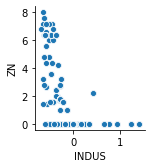

In [152]:
sns.pairplot(df_raw, y_vars= ["ZN"], x_vars = ["INDUS"])  

In [151]:
corr , pval = stats.pearsonr(df_raw_y , df_raw_x["ZN"])
print(corr)
print(pval)
#상관계수가 0.36이므로 주거지 비율과 주택 가격은 유의하지 않다.

0.366975899965118
4.775069892163934e-16


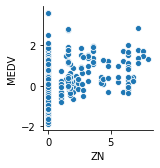

In [153]:
sns.pairplot(df_raw, y_vars= ["MEDV"], x_vars = ["ZN"])

가설8. 중심지가 가까울 수록 집 값은 높을 것이다.

In [154]:
corr , pval = stats.pearsonr(df_raw_y , df_raw_x["DIS"])
print(corr)
print(pval)
#상관계수가 0.27이므로 중심지와 주택 가격은 유의하지 않다.

0.27084785869154304
3.838097192306027e-09


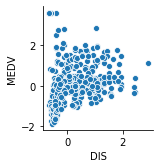

In [155]:
sns.pairplot(df_raw, y_vars= ["MEDV"], x_vars = ["DIS"])

In [72]:
df_raw.corr().round(3) #전체 상관계수

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000,-0.423,0.367,-0.470,0.135,-0.432,0.582,-0.404,0.271,-0.330,-0.421,-0.429,0.364,-0.735
CRIM,-0.423,1.000,-0.276,0.554,-0.023,0.586,-0.107,0.457,-0.487,0.859,0.797,0.359,-0.488,0.530
ZN,0.367,-0.276,1.000,-0.529,-0.073,-0.511,0.350,-0.560,0.679,-0.294,-0.292,-0.361,0.169,-0.426
INDUS,-0.470,0.554,-0.529,1.000,0.073,0.754,-0.363,0.633,-0.712,0.567,0.696,0.346,-0.348,0.597
CHAS,0.135,-0.023,-0.073,0.073,1.000,0.118,-0.015,0.111,-0.122,0.021,-0.014,-0.090,0.035,0.007
NOX,-0.432,0.586,-0.511,0.754,0.118,1.000,-0.288,0.723,-0.763,0.583,0.644,0.149,-0.390,0.587
RM,0.582,-0.107,0.350,-0.363,-0.015,-0.288,1.000,-0.231,0.214,-0.078,-0.172,-0.248,0.035,-0.567
AGE,-0.404,0.457,-0.560,0.633,0.111,0.723,-0.231,1.000,-0.735,0.424,0.481,0.244,-0.262,0.621
DIS,0.271,-0.487,0.679,-0.712,-0.122,-0.763,0.214,-0.735,1.000,-0.462,-0.512,-0.223,0.282,-0.502
RAD,-0.330,0.859,-0.294,0.567,0.021,0.583,-0.078,0.424,-0.462,1.000,0.901,0.432,-0.432,0.430


# 4. 모델링

### 4-1 다중회귀분석 

In [73]:
lr_model=smf.ols(formula='MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B',data=df_raw)
lr_result=lr_model.fit()
print(lr_result.summary())

#해당 모델의 설명력은 68.4%이며
#분산분석결과 p값이 유의수준 0.05보다 작으므로 회귀모델로서 유의하다
#그러나 p값이 높은 coef 변수도 보이며 다중 공선성을 확인해야한다

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     62.03
Date:                Fri, 07 Feb 2020   Prob (F-statistic):           4.78e-87
Time:                        14:54:05   Log-Likelihood:                -388.56
No. Observations:                 458   AIC:                             803.1
Df Residuals:                     445   BIC:                             856.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1178      0.042      2.818      0.0

In [74]:
df_raw_x=df_raw.drop("MEDV",axis=1)
df_raw_x_const=add_constant(df_raw_x)
df_vif=pd.DataFrame()
df_vif['variable']=df_raw_x_const.columns
df_vif['VIF']=[variance_inflation_factor(df_raw_x_const.values,i)for i in range(df_raw_x_const.shape[1])]
#VIF정렬
df_vif.sort_values('VIF',inplace=True)
df_vif.round(3)

#다중공선성이

,variable,VIF
4,CHAS,1.069
12,B,1.420
11,PTRATIO,1.643
6,RM,1.935
2,ZN,2.387
0,const,2.500
13,LSTAT,3.079
7,AGE,3.115
3,INDUS,3.779
8,DIS,4.028


### 4-1-1 회귀분석 - 후진제거법을 통한 중요도 변수 선택 

In [75]:
#변수가 5개가 남을 때 까지 후진제거법 적용

df_raw_y = df_raw["MEDV"]

model = LinearRegression()

rfe = RFE(estimator = model, n_features_to_select=5).fit(df_raw_x, df_raw_y)

#선택된 변수 
selected_cols = df_raw_x.columns[rfe.support_]

#제거된 변수
removed_cols = df_raw_x.columns[~rfe.support_]

print("후진제거법 적용 후 선택된 변수들:",selected_cols)
print("후진제거법 적용 후 제거된 변수들:",removed_cols)

#NOX RM DIS PTRATIO LSTAT B 변수의 중요도가 높음

후진제거법 적용 후 선택된 변수들: Index(['CHAS', 'DIS', 'RAD', 'TAX', 'LSTAT'], dtype='object')
후진제거법 적용 후 제거된 변수들: Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'PTRATIO', 'B'], dtype='object')


In [76]:
#남은 변수들로 회귀 모델 생성
rfe_reg_model = smf.ols(formula="MEDV~ NOX + RM + DIS + PTRATIO + LSTAT",data = df_raw)

#회귀분석 표 출력
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     166.6
Date:                Fri, 07 Feb 2020   Prob (F-statistic):          3.91e-100
Time:                        14:54:05   Log-Likelihood:                -374.45
No. Observations:                 458   AIC:                             760.9
Df Residuals:                     452   BIC:                             785.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2094      0.032      6.453      0.0

In [77]:
#설명변수가 줄어들었음에도 모델의 설명력 R**2가 70.8%로 증가하였으며
#각 coef들의 p값또한 0.05보다 낮아 결정계수가 유의함.(단, 절편은 검토하지 않음)

#남은변수들 다중공선성 재진단
df_raw_x_rfe = df_raw_x[selected_cols]
df_raw_x_rfe_const = add_constant(df_raw_x_rfe)

#다중공선성 저장
df_rfe_vif = pd.DataFrame()
df_rfe_vif["variable"] = df_raw_x_rfe_const.columns
df_rfe_vif["VIF"] = [variance_inflation_factor(df_raw_x_rfe_const.values, i) for i in range(df_raw_x_rfe_const.shape[1])]
df_rfe_vif.sort_values("VIF",inplace = True)
df_rfe_vif.round(3)

#선택된 설명변수에 다중공선성은 문제가 없음을 확인할 수 있었다.

,variable,VIF
1,CHAS,1.031
5,LSTAT,1.492
2,DIS,1.563
0,const,1.822
3,RAD,5.349
4,TAX,5.950


### 4-1-2 회귀분석 - 최종 회귀모델 도출

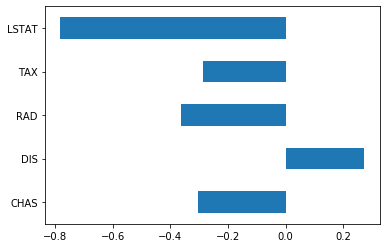

In [78]:
df_reg_coef = pd.DataFrame({"Coef":rfe_reg_result.params.values[1:]},index = selected_cols)
df_reg_coef.plot.barh(y = "Coef", legend = False)

#설명변수의 표준화를 앞서서 했기에 따로 표준화회귀계수 도출은 수행하지 않는다 

In [79]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

#데이터분할
from sklearn.model_selection import train_test_split

#회귀
import statsmodels.formula.api as smf

#결정나무
from sklearn.tree import DecisionTreeRegressor

#랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

#그래디언트 부스팅
from sklearn.ensemble import GradientBoostingRegressor

#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

matplotlib.rc("font", family = "Malgun Gothic")

In [80]:
#평가함수 정의

#RMSE
def root_mean_squared_error(y_true, y_pred) :
    return np.sqrt(mean_squared_error(y_true, y_pred))

#MAPE
def mean_absolute_percentage_error(y_true, y_pred) : 
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [81]:
#예측 및 평가
models = ["Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]

mse, rmse, mae, mape = [],[],[],[]

###회귀분석
#예측 
lr_y_pred = rfe_reg_result.predict(df_test_x)
#평가
mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

In [82]:
df_pred = pd.DataFrame({'prediction':rfe_reg_result.predict(df_test_x)})
df_pred.describe()

,prediction
count,138.000000
mean,0.105813
std,0.665116
min,-1.304884
25%,-0.404083
50%,0.093404
75%,0.603398
max,1.488032


In [83]:
df_test_y.describe()

count    138.000000
mean       0.001908
std        0.827521
min       -1.780564
25%       -0.379310
50%       -0.012539
75%        0.335423
max        3.611285
Name: MEDV, dtype: float64

### 4-2 의사결정나무 모델링  

In [84]:
#step1:데이터 구성하기
df=pd.read_csv("/Users/joylee/Downloads/Bigdata/BOSTON_HOUSING.csv", engine = 'python',encoding='euckr')

#설명변수 , 목적변수 나눔
df_y=df['MEDV']
df_x=df.drop("MEDV",axis=1,inplace=False)

In [85]:
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_x,df_y,test_size=0.3,random_state=1234)
print('train data X size:{}'.format(df_train_x.shape))
print('train data Y size:{}'.format(df_train_y.shape))
print('test data X size:{}'.format(df_test_x.shape))
print('test data Y size:{}'.format(df_test_y.shape))

df

train data X size:(354, 13)
train data Y size:(354,)
test data X size:(152, 13)
test data Y size:(152,)


,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.400000,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67
502,20.600000,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08
503,23.900000,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64
504,22.000000,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48


In [86]:
#모델 생성하기
tree_uncustomized=DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)
#Train 데이터 설명력
print("Score on training set:{:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Score on training set:1.000
Score on test set:0.858


In [87]:
#모델 Parameter 조정
#train 및 test 설명력 결과 저장
train_score=[];test_score=[]
#min_samples_leaf:입사귀 최소자료수
para_leaf=[n_leaf*1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeRegressor(random_state=1234
                              , min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))

#결과 저장
df_score_leaf=pd.DataFrame()
df_score_leaf["MinSamplesLeaf"]=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=test_score

In [88]:
#모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.858
1,2,0.987,0.849
2,3,0.973,0.865
3,4,0.951,0.854
4,5,0.928,0.861
5,6,0.898,0.853
6,7,0.885,0.843
7,8,0.874,0.838
8,9,0.862,0.831
9,10,0.849,0.831


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


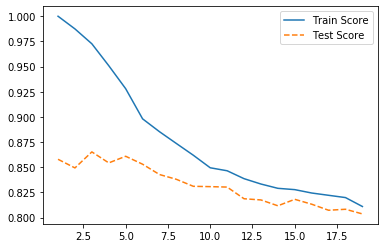

In [89]:
#min sample leaf 선정
plt.plot(para_leaf,train_score,linestyle='-',label='Train Score')
plt.plot(para_leaf,test_score,linestyle='--',label='Test Score')
plt.legend() # Train Score와 Valid Score를 고려했을 때,
#min sample leaf 5으로 선정

In [90]:
#train 및 test 설명력 결과 저장
train_score=[];test_score=[]
#min_samples_split:분리 노드의 최소 자료수
para_split=[n_split*2 for n_split in range(2,40)]

for v_min_samples_split in para_split:
    tree=DecisionTreeRegressor(random_state=1234,min_samples_leaf=5,
                               min_samples_split=v_min_samples_split)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
#결과 저장
df_score_split=pd.DataFrame()
df_score_split['MinSamplesSplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.928,0.861
1,6,0.928,0.861
2,8,0.928,0.861
3,10,0.928,0.861
4,12,0.926,0.861
5,14,0.923,0.862
6,16,0.914,0.848
7,18,0.909,0.853
8,20,0.897,0.865
9,22,0.892,0.861


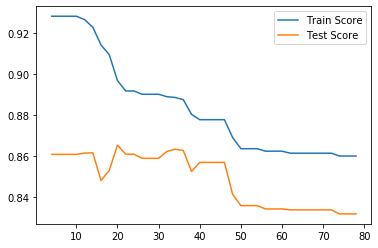

In [91]:
#MinSamplesSplit

#모델 설명력 그래프 확인
plt.plot(para_split,train_score,linestyle='-',label='Train Score')
plt.plot(para_split,test_score,linestyle='-',label='Test Score')
plt.legend()

#19로 선정

In [92]:
#train 및 test 설명력 결과 저장
train_score=[]; test_score=[]
#max_depth: 최대 깊이 변경
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeRegressor(random_state=1234,min_samples_leaf=5,
                               min_samples_split=19,max_depth=v_max_depth)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
#데이터 테이블로 저장
df_score_split=pd.DataFrame()
df_score_split['Depth']=para_depth
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=test_score
df_score_split.round(3)

,Depth,TrainScore,TestScore
0,1,0.442,0.443
1,2,0.692,0.711
2,3,0.788,0.766
3,4,0.864,0.835
4,5,0.886,0.845
5,6,0.898,0.846
6,7,0.903,0.849
7,8,0.904,0.851
8,9,0.905,0.852
9,10,0.906,0.853


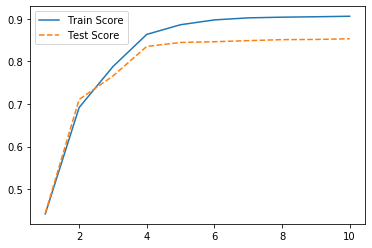

In [93]:
#모델 설명력 그래프 확인
plt.plot(para_depth,train_score,linestyle='-',label='Train Score')
plt.plot(para_depth,test_score,linestyle='--',label='Test Score')
plt.legend()

#maxdepth 4 선정

In [94]:
#STEP3:최종 모델 선정
tree_final=DecisionTreeRegressor(min_samples_leaf=5,min_samples_split=19,max_depth=4,random_state=1234)
tree_final.fit(df_train_x,df_train_y)

#최종 모델 성능
print("최종 Score on training set:{:.3f}".format(tree_final.score(df_train_x,df_train_y)))
print("최종 Score on test set:{:.3f}".format(tree_final.score(df_test_x,df_test_y)))

최종 Score on training set:0.864
최종 Score on test set:0.835


In [95]:
df_pred = pd.DataFrame({'prediction':tree_final.predict(df_test_x)}) #예측값
df_pred.describe()

,prediction
count,152.000000
mean,22.777227
std,9.177546
min,10.797297
25%,15.174194
50%,20.455769
75%,24.155952
max,47.471428


In [96]:
df_test_y.describe()

count    152.000000
mean      22.636842
std        9.632779
min        5.000000
25%       15.975000
50%       21.350000
75%       27.025000
max       50.000000
Name: MEDV, dtype: float64

In [97]:
#결론도출
#변수명 저장
v_feature_name=df_train_x.columns
#tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=tree_final.feature_importances_

#df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
12,LSTAT,0.608
5,RM,0.281
7,DIS,0.089
11,B,0.009
9,TAX,0.006
0,CRIM,0.006
1,ZN,0.000
2,INDUS,0.000
3,CHAS,0.000
4,NOX,0.000


# 의사결정나무 모델링 요인 평가 

#### (10점 만점 - 요인중요도* 10)  
1. LSTAT = 6.4  
2. RM = 1.8  
3. NOX = 0.9
4. DIS = 0.7
5. INDUS = 0.1
6. CRIM = 0.1

### 4-3 랜덤포레스트 모델링

In [98]:
#모델 생성하기
rf_uncustomized=RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)
#Train 데이터 설명력
print("Score on training set:{:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Score on training set:1.000
Score on test set:0.858


In [99]:
#모델 Parameter 조정
#train 및 test 설명력 결과 저장
train_score=[]; test_score=[]
#n_estimatos:트리 수 변경:1-100
para_n_tree=[n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf=RandomForestRegressor(random_state=1234
                              , n_estimators=v_n_estimators)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

#결과 저장
df_score_n=pd.DataFrame()
df_score_n["n_estimators"]=para_n_tree
df_score_n['TrainScore']=train_score
df_score_n['TestScore']=test_score

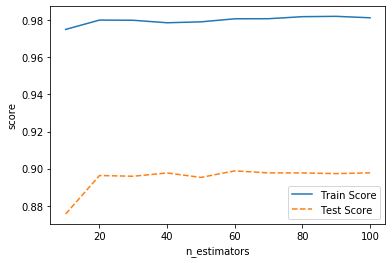

In [100]:
#모델 설명력 그래프 확인
plt.plot(para_n_tree,train_score,linestyle='-',label='Train Score')
plt.plot(para_n_tree,test_score,linestyle='--',label='Test Score')
plt.ylabel('score');plt.xlabel('n_estimators')
plt.legend()

#트리의 개수 20선정

In [101]:
#train 및 test 설명력 결과 저장
train_score=[]; test_score=[]
#min_samples_leaf:입사귀 최소자료수
para_leaf=[n_leaf*1 for n_leaf in range(1,10)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestRegressor(random_state=1234,n_estimators=20,
                              min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

#결과 저장
df_score_leaf=pd.DataFrame()
df_score_leaf["MinSamplesLeaf"]=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=test_score

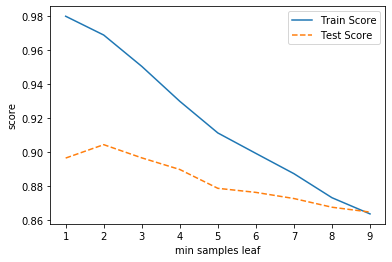

In [102]:
#모델 설명력 그래프 확인
plt.plot(para_leaf,train_score,linestyle='-',label='Train Score')
plt.plot(para_leaf,test_score,linestyle='--',label='Test Score')
plt.ylabel('score');plt.xlabel('min samples leaf')
plt.legend()

#min leaf의 숫자 2 선정

In [103]:
#train 및 test 설명력 결과 저장
train_score=[];test_score=[]
#min_samples_split:분리 노드의 최소 자료수
para_split=[n_split*1 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf=RandomForestRegressor(random_state=1234,n_estimators=20,min_samples_leaf=2,
                               min_samples_split=v_min_samples_split)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
#결과 저장
df_score_split=pd.DataFrame()
df_score_split['MinSamplesSplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=test_score
df_score_split.round(3) #모델 설명력 확인

,MinSamplesSplit,TrainScore,TestScore
0,2,0.969,0.904
1,3,0.969,0.904
2,4,0.969,0.904
3,5,0.967,0.894
4,6,0.964,0.901
5,7,0.962,0.896
6,8,0.960,0.896
7,9,0.957,0.896
8,10,0.954,0.894
9,11,0.949,0.889


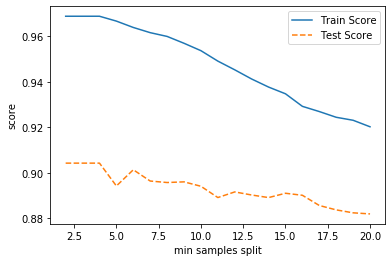

In [104]:
#모델 설명력 그래프 확인
plt.plot(para_split,train_score,linestyle='-',label='Train Score')
plt.plot(para_split,test_score,linestyle='--',label='Test Score')
plt.ylabel('score');plt.xlabel('min samples split')
plt.legend()

#minsplit 20선정 -> 과적합 방지용 

In [105]:
#train 및 test 설명력 결과 저장
train_score=[]; test_score=[]
#max_depth: 최대 깊이 변경
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf=RandomForestRegressor(random_state=1234,n_estimators=20,min_samples_leaf=2,
                               min_samples_split=20,max_depth=v_max_depth)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
#데이터 테이블로 저장
df_score_split=pd.DataFrame()
df_score_split['Depth']=para_depth
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=test_score
df_score_split.round(3)

,Depth,TrainScore,TestScore
0,1,0.569,0.590
1,2,0.767,0.785
2,3,0.867,0.853
3,4,0.894,0.875
4,5,0.908,0.881
5,6,0.915,0.880
6,7,0.917,0.884
7,8,0.919,0.886
8,9,0.920,0.882
9,10,0.920,0.884


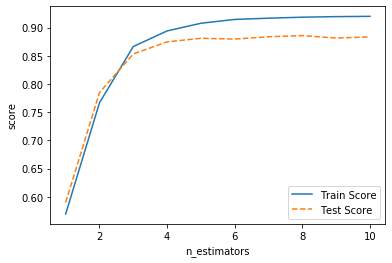

In [106]:
#모델 설명력 그래프 확인
plt.plot(para_depth,train_score,linestyle='-',label='Train Score')
plt.plot(para_depth,test_score,linestyle='--',label='Test Score')
plt.ylabel('score');plt.xlabel('n_estimators')
plt.legend()
#maxdepth 4선정

In [107]:
#STEP3:최종 모델 선정
rf_final=RandomForestRegressor(n_estimators=20,min_samples_leaf=2,min_samples_split=20,max_depth=4,random_state=1234)
rf_final.fit(df_train_x,df_train_y)

#최종 모델 성능
print("최종 Score on training set:{:.3f}".format(rf_final.score(df_train_x,df_train_y)))
print("최종 Score on test set:{:.3f}".format(rf_final.score(df_test_x,df_test_y)))

최종 Score on training set:0.894
최종 Score on test set:0.875


In [108]:
df_pred = pd.DataFrame({'prediction':tree_final.predict(df_test_x)}) #예측값
df_pred.describe()

,prediction
count,152.000000
mean,22.777227
std,9.177546
min,10.797297
25%,15.174194
50%,20.455769
75%,24.155952
max,47.471428


In [109]:
df_test_y.describe()

count    152.000000
mean      22.636842
std        9.632779
min        5.000000
25%       15.975000
50%       21.350000
75%       27.025000
max       50.000000
Name: MEDV, dtype: float64

In [110]:
#결론도출
v_feature_name=df_train_x.columns
#tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=rf_final.feature_importances_

#df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
12,LSTAT,0.514
5,RM,0.353
7,DIS,0.066
0,CRIM,0.026
4,NOX,0.014
6,AGE,0.009
10,PTRATIO,0.009
9,TAX,0.004
11,B,0.003
2,INDUS,0.002


# 랜덤 포레스트 모델링 요인 평가 
### (10점 만점 - 요인중요도* 10)  
1. LSTAT = 5.1
2. RM = 3.5
3. NOX = 0.6
4. DIS = 0.3
5. INDUS = 0.1
6. CRIM = 0.1
7. PTRATIO = 0.1

### 4-4 그래디언트 부스팅 모델링

In [111]:
#일반 모델 생성
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)
print("Score on training set:{:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set:{:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))
#과적합임.

Score on training set:0.981
Score on test set:0.903


In [112]:
#트리수 변경에 따른 성능모델
train_score = []; test_score =[]
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["testScore"] = test_score
df_score_n.round(3)

,n_estimators,TrainScore,testScore
0,10,0.770,0.753
1,20,0.907,0.866
2,30,0.942,0.888
3,40,0.957,0.895
4,50,0.965,0.898
5,60,0.970,0.899
6,70,0.974,0.900
7,80,0.978,0.903
8,90,0.979,0.903
9,100,0.981,0.903


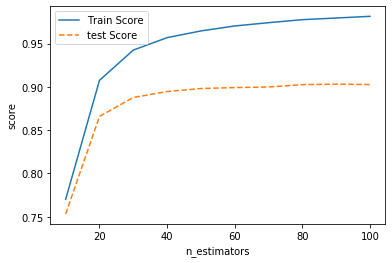

In [113]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()
#test 성능 변화를 고려하여 20선택

In [114]:
train_score = []; test_score =[]
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = GradientBoostingRegressor(random_state=1234, n_estimators = 20,
                              min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["testScore"] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,testScore
0,1,0.907,0.866
1,2,0.907,0.860
2,3,0.903,0.865
3,4,0.901,0.870
4,5,0.894,0.863
5,6,0.888,0.863
6,7,0.881,0.863
7,8,0.876,0.853
8,9,0.873,0.857
9,10,0.868,0.855


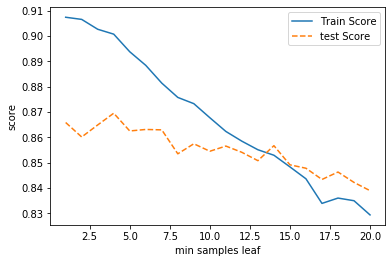

In [115]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()
#4선택

In [116]:
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(1,21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=20, min_samples_leaf=4, min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["testScore"] = test_score
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,testScore
0,2,0.901,0.870
1,4,0.901,0.870
2,6,0.901,0.870
3,8,0.901,0.870
4,10,0.901,0.866
5,12,0.901,0.871
6,14,0.901,0.871
7,16,0.901,0.871
8,18,0.901,0.871
9,20,0.895,0.864


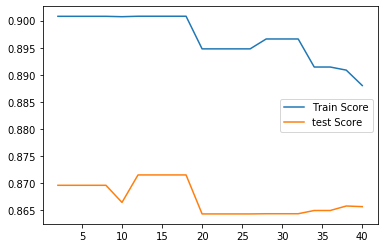

In [117]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "-", label = "test Score")
plt.legend()
#18선택

In [118]:
train_score = []; test_score =[]
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 20,
                              min_samples_leaf = 4, min_samples_split = 18, max_depth=v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["testScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,testScore
0,1,0.685,0.702
1,2,0.830,0.802
2,3,0.901,0.871
3,4,0.927,0.882
4,5,0.941,0.893
5,6,0.949,0.886
6,7,0.955,0.895
7,8,0.958,0.895
8,9,0.960,0.899
9,10,0.960,0.897


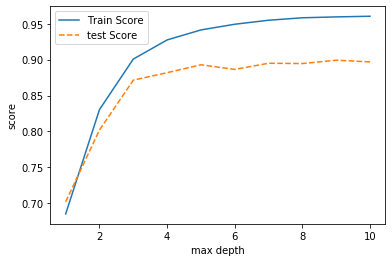

In [119]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()
#3선택

In [120]:
train_score = []; test_score =[]
para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 20,
                              min_samples_leaf = 4, min_samples_split = 18, max_depth=3, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["testScore"] = test_score
df_score_lr.round(3)

,LearningRate,TrainScore,testScore
0,0.1,0.901,0.871
1,0.2,0.950,0.897
2,0.3,0.959,0.902
3,0.4,0.970,0.914
4,0.5,0.974,0.903
5,0.6,0.972,0.904
6,0.7,0.979,0.902
7,0.8,0.981,0.903
8,0.9,0.981,0.884


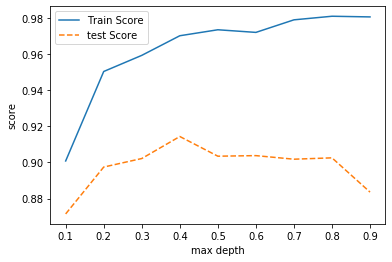

In [121]:
plt.plot(para_lr, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_lr, test_score, linestyle = "--", label = "test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()
#0.2선택

In [122]:
gb_final = GradientBoostingRegressor(random_state = 1234, n_estimators=20, min_samples_leaf=4, min_samples_split=18, max_depth=2, learning_rate=0.2)
gb_final.fit(df_train_x, df_train_y)

print("Score on training set:{:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set:{:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set:0.908
Score on test set:0.857


In [123]:
df_pred = pd.DataFrame({'prediction':gb_final.predict(df_test_x)}) #예측값
df_pred.describe()

,prediction
count,152.000000
mean,22.702719
std,8.579025
min,10.109475
25%,16.455352
50%,21.242222
75%,25.350815
max,47.132302


In [124]:
df_test_y.describe() #실제값

count    152.000000
mean      22.636842
std        9.632779
min        5.000000
25%       15.975000
50%       21.350000
75%       27.025000
max       50.000000
Name: MEDV, dtype: float64

In [125]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance",ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
12,LSTAT,0.495
5,RM,0.345
7,DIS,0.078
10,PTRATIO,0.031
4,NOX,0.029
0,CRIM,0.013
9,TAX,0.007
11,B,0.002
1,ZN,0.000
2,INDUS,0.000


# 그래디언트 부스팅 모델링 요인 평가 

### (10점 만점 - 요인중요도* 10)  
1. LSTAT = 5
2. RM = 3.5
3. DIS = 0.8
4. PTRATIO = 0.3
5. NOX = 0.3
6. CRIM = 0.1
7. TAX = 0.1

In [126]:
#남은 변수들로 회귀 모델 생성
lr= smf.ols(formula="MEDV~ NOX + RM + DIS + PTRATIO + LSTAT",data = df)

#직접 회귀분석 표를 확인해보자
lr_result = lr.fit()
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     242.6
Date:                Fri, 07 Feb 2020   Prob (F-statistic):          3.67e-131
Time:                        14:54:20   Log-Likelihood:                -1528.7
No. Observations:                 506   AIC:                             3069.
Df Residuals:                     500   BIC:                             3095.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.4992      4.613      8.129      0.0

In [127]:
#예측 및 평가
models = ["Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]

mse, rmse, mae, mape = [],[],[],[]


#예측 
lr_y_pred = lr_result.predict(df_test_x)
#평가
mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

###의사결정나무
#예측
dt_y_pred = tree_final.predict(df_test_x)
#평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

###랜덤포레스트
#예측
rf_y_pred = rf_final.predict(df_test_x)
#평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

###그래디언트 부스팅
#예측
gb_y_pred = gb_final.predict(df_test_x)
#평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


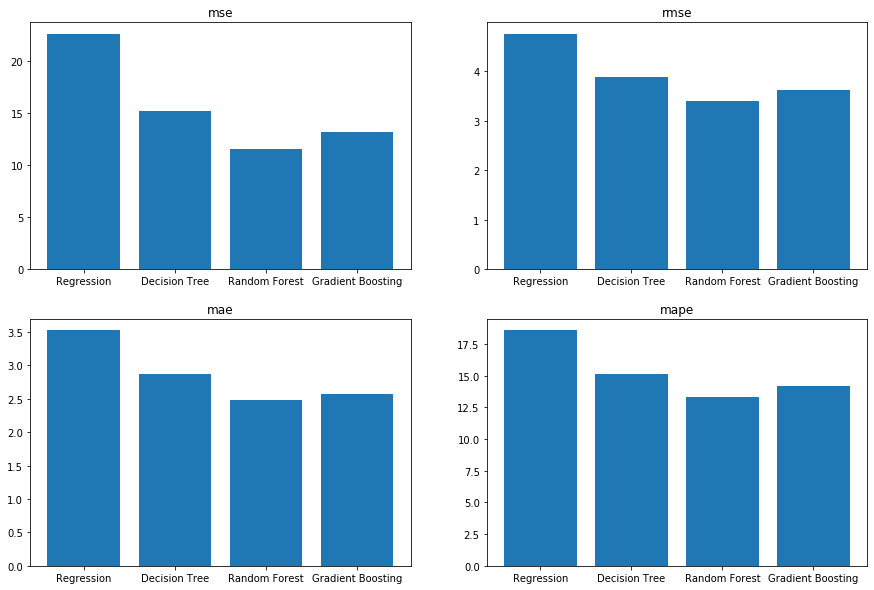

In [128]:
#시각화 - 평가
fig, ax = plt.subplots(2,2, figsize = (15,10))
ax[0,0].bar(models, mse)
ax[0,0].set_title("mse").set_fontsize(12)

ax[0,1].bar(models, rmse)
ax[0,1].set_title("rmse").set_fontsize(12)

ax[1,0].bar(models, mae)
ax[1,0].set_title("mae").set_fontsize(12)

ax[1,1].bar(models, mape)
ax[1,1].set_title("mape").set_fontsize(12)

# 결론

## 주택 가격이 싸려면:

1. 저소득층 비율이 높아야 한다. -> 대체 할 수 없다.

2. 방의 개수가 적어야 한다. -> 한 방의 크기가 큰 게 효율적이다. 
		                 (공간을 분할 하지 않는다.)

3. 중심지와의 거리가 멀어야 한다. -> 대체 할 수 없다.

4. 산화 질소 농도가 높아야 한다. -> 공기 청정기로 커버할 수 있다.

5. 오래된 건물 이어야 한다 -> 인테리어를 통해 새로운 건물로 변모시킨다.

## 비지니스적 의사결정:

1. 건물 가격이 낮은, 저소득층 비율이 높은 지역을 탐색한다.

2. 방의 개수가 적어야 가격이 싸므로, 최대한 큰 공간을 활용할 수 있는 공용 공간을 만들어야 한다.

3. 건물 가격이 낮은, 중심지와의 거리가 먼 지역을 탐색한다. 

4. 산화 질소 농도가 높이기 위하여, 공기 청정기를 설치한다.

5. 오래된 건물을 구입하여, 새로 인테리어 한다.

## BOSTON에서는 
저소득층 비율이 많으면서 중심지와 거리가 먼 지역에 위치한 낡은 건물을 구입하여 
새롭게 인테리어하고, 방을 분할하지 않으며 공기청정기를 유치하는 것이 가장 저렴하게
좋은 건물을 구입하는 방법이다. 

## 그렇다면?
저소득층 비율이 많으면서 중심지와 거리가 먼 지역에 위치한 낡은 건물을 구입하여 
새롭게 인테리어하고, 방을 분할하지 않으며 공기청정기를 유치하는 것만으로 
크고 고정적인 수입을 얻을 수 있는 비지니스가 무엇이 있을까?

## 답은 PC방 창업이다!!
--------------------------------------------
특징                  답인 이유
이용금액 저렴 -> 저소득층도 이용 가능
(*저소득층 비율이 많은 곳에 설치해도 된다는 의미임)

주거지에 밀집 -> 주로 여가시간에 방문

분할 된 방이 필요 없음 -> 공사비 절약

단골 형성이 쉬움 -> 고정적인 수입 확보

전기가 많이 필요함 ->BOSTON은 전기세 낮음